In [98]:
# Importação de libs
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA, sarimax
from statsmodels.tsa.seasonal import seasonal_decompose


In [99]:
#Leitura do DataSet selecionado para estudo

dataSet = pd.read_csv('./dataset_tk.csv', decimal='.')

In [ ]:
dataSet #Visualização rápida dos dados

,data,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [101]:
#Analisando se há valores nulos e tipo de valor da variável
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data               503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [102]:
#Analisando características estatísticas
dataSet.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [103]:
#Criando uma coluna com o consumo total de energia ao longo do tempo
dataSet['consumoTotal'] = dataSet.iloc[:, 1:].sum(axis=1)

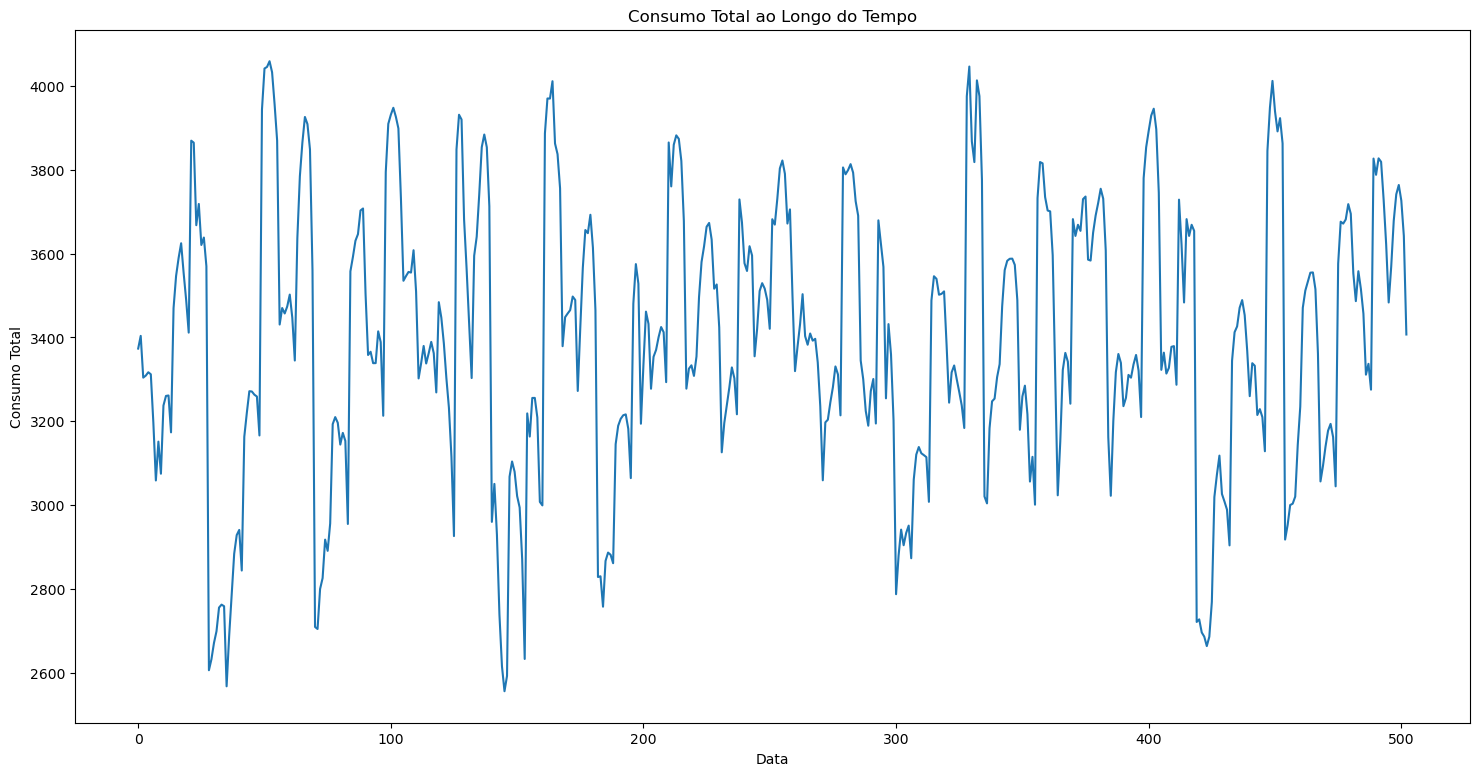

In [104]:
plt.figure(figsize=(18, 9))
plt.plot(dataSet['consumoTotal'])
plt.xlabel('Data')
plt.ylabel('Consumo Total')
plt.title('Consumo Total ao Longo do Tempo')
plt.show()

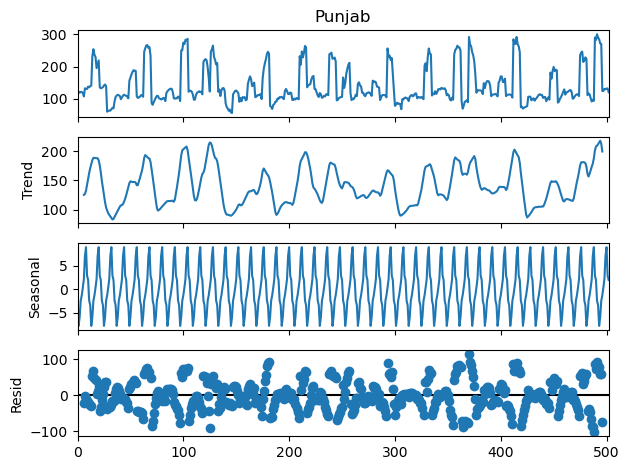

In [105]:
serieTemporal = seasonal_decompose(dataSet['Punjab'], model='add', period=12).plot()

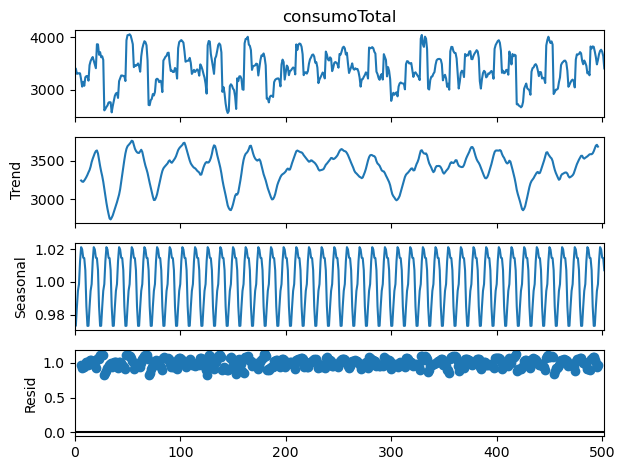

In [106]:
serieTemporal = seasonal_decompose(dataSet['consumoTotal'], model='mult', period=12).plot()

In [110]:
dataFrame = pd.DataFrame(dataSet)
dataFrame['dia'] = dataFrame['data'].dt.day
dataFrame['mes'] = dataFrame['data'].dt.month
dataFrame['ano'] = dataFrame['data'].dt.year
print (dataFrame)

AttributeError: Can only use .dt accessor with datetimelike values

In [95]:
#teste de normalidade da série temporal
teste = stats.shapiro(dataSet['Punjab'])
print(teste)

ShapiroResult(statistic=0.8424054622041054, pvalue=5.882208981488069e-22)
